# APIs + OAI-PMH



### Librerías necesarias para la práctica

```python
import xml.etree.ElementTree as ET
import requests
import json
```

In [1]:
import xml.etree.ElementTree as ET
import requests
import json

## Parte 1 - APIs - Swagger
Vamos a utilizar el ejemplo de la tienda de mascotas en swagger:
https://petstore.swagger.io

#### Ejercicio 1 - Lista 10 mascotas registradas

In [2]:
url = 'https://petstore.swagger.io/v2/pet/1'
headers = {'Accept': 'application/json'}
request = requests.get(url, headers=headers)
print(request.text)

{"code":1,"type":"error","message":"Pet not found"}


In [3]:
# Mostrar las mascotas disponibles: status=available
url = 'https://petstore.swagger.io/v2/pet/findByStatus?status=available'
headers = {'Accept': 'application/json'}
request = requests.get(url, headers=headers)
print(request.status_code)

mascotas = json.loads(request.text)
# Mostramos las primeras 10 mascotas:
for mascota in mascotas[:10]: 
    print(f"ID: {mascota['id']}, Name: {mascota['name']},  Photourl: {mascota['photoUrls']}, Status: {mascota['status']}")


200
ID: 9223372036854775323, Name: fish,  Photourl: ['string'], Status: available
ID: 9223372036854775325, Name: doggie,  Photourl: ['string'], Status: available
ID: 9223372036854775326, Name: doggie,  Photourl: ['string'], Status: available
ID: 9223372036854775327, Name: doggie,  Photourl: ['string'], Status: available
ID: 9223372036854775328, Name: fish,  Photourl: ['string'], Status: available
ID: 9223372036854775329, Name: doggie,  Photourl: ['string'], Status: available
ID: 9223372036854775330, Name: doggie,  Photourl: ['string'], Status: available
ID: 9223372036854775333, Name: doggie,  Photourl: ['string'], Status: available
ID: 9223372036854775342, Name: ZAP,  Photourl: ['John Doe'], Status: available
ID: 9223372036854775343, Name: ZAP,  Photourl: ['John Doe'], Status: available


#### Ejercicio 2 - Registra una nueva mascota con tu nombre

In [4]:
url = 'https://petstore.swagger.io/v2/pet'
headers = {'Content-Type':'application/json'}
text = {
  "id": 333,
  "category": {
    "id": 3,
    "name": "string"
  },
  "name": "Chen",
  "photoUrls": [
    "string"
  ],
  "tags": [
    {
      "id": 33,
      "name": "string"
    }
  ],
  "status": "available"
}
# para convertir el diccionario a json
nueva_mascota = json.dumps(text)
# Post
request = requests.post(url, data=nueva_mascota, headers=headers)

#### Ejercico 3 - Encuentra la mascota registrada con su ID

In [5]:
url = 'https://petstore.swagger.io/v2/pet/333'
headers = {'Accept': 'application/json'}
request = requests.get(url, headers=headers)
mascota = json.loads(request.text)
print(f"ID: {mascota['id']}, Name: {mascota['name']},  Photourl: {mascota['photoUrls']}, Status: {mascota['status']}")

ID: 333, Name: Chen,  Photourl: ['string'], Status: available


## Parte 2 - OAI-PMH
La documentación del protocolo la podéis encontrar aquí:

https://www.openarchives.org/OAI/openarchivesprotocol.html

### Identify

This verb is used to retrieve information about a repository. Some of the information returned is required as part of the OAI-PMH. Repositories may also employ the Identify verb to return additional descriptive information.

In [6]:
import xml.etree.ElementTree as ET
import requests

base_url = "https://zenodo.org/oai2d"
action = "?verb=Identify"
print("Request to: %s%s" % (base_url, action))
oai = requests.get(base_url + action) #Peticion al servidor

#Para crear el arbol XML
xmlTree = ET.fromstring(oai.text)
print(oai.text)
#Iterator para recorrer todos los elementos (incluso anidados)
iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag+": "+elem.text)

#Findall para encontrar un elemento específico
namespaces = {'ns': 'http://www.openarchives.org/OAI/2.0/'} # add more as needed
elementos = xmlTree.findall('.//ns:baseURL',namespaces)
print(elementos) #Element
for e in elementos:
    print("BaseURL:", e.text)


Request to: https://zenodo.org/oai2d?verb=Identify
<?xml version='1.0' encoding='UTF-8'?>
<?xml-stylesheet type="text/xsl" href="/static/oai2.xsl"?>
<OAI-PMH xmlns="http://www.openarchives.org/OAI/2.0/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openarchives.org/OAI/2.0/ http://www.openarchives.org/OAI/2.0/OAI-PMH.xsd">
  <responseDate>2024-12-16T19:12:20Z</responseDate>
  <request verb="Identify">https://zenodo.org/oai2d</request>
  <Identify>
    <repositoryName>Zenodo</repositoryName>
    <baseURL>https://zenodo.org/oai2d</baseURL>
    <protocolVersion>2.0</protocolVersion>
    <adminEmail>info@zenodo.org</adminEmail>
    <earliestDatestamp>2014-02-03T14:41:33Z</earliestDatestamp>
    <deletedRecord>no</deletedRecord>
    <granularity>YYYY-MM-DDThh:mm:ssZ</granularity>
  </Identify>
</OAI-PMH>

{http://www.openarchives.org/OAI/2.0/}OAI-PMH: 
  
{http://www.openarchives.org/OAI/2.0/}responseDate: 2024-12-16T19:12:20Z
{http://www.openarchives.

### Listar tipos de metadatos

ListMetadataFormats

This verb is used to retrieve the metadata formats available from a repository. An optional argument restricts the request to the formats available for a specific item.


In [7]:
import xml.etree.ElementTree as ET
import requests

base_url = 'https://zenodo.org/oai2d'
action = '?verb=ListMetadataFormats'

oai = requests.get(base_url + action) #Peticion al servidor

#Para crear el arbol XML
xmlTree = ET.fromstring(oai.text)

iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag+": "+elem.text)

{http://www.openarchives.org/OAI/2.0/}OAI-PMH: 
  
{http://www.openarchives.org/OAI/2.0/}responseDate: 2024-12-16T19:12:20Z
{http://www.openarchives.org/OAI/2.0/}request: https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}ListMetadataFormats: 
    
{http://www.openarchives.org/OAI/2.0/}metadataFormat: 
      
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: marcxml
{http://www.openarchives.org/OAI/2.0/}schema: https://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
{http://www.openarchives.org/OAI/2.0/}metadataNamespace: https://www.loc.gov/standards/marcxml/
{http://www.openarchives.org/OAI/2.0/}metadataFormat: 
      
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: oai_dc
{http://www.openarchives.org/OAI/2.0/}schema: http://www.openarchives.org/OAI/2.0/oai_dc.xsd
{http://www.openarchives.org/OAI/2.0/}metadataNamespace: http://www.openarchives.org/OAI/2.0/oai_dc/
{http://www.openarchives.org/OAI/2.0/}metadataFormat: 
      
{http://www.openarchives.org/OAI/2

Podemos capturar sólo la información relevante

In [8]:
iterator = xmlTree.iter()
for elem in iterator:
    if (elem.tag == '{http://www.openarchives.org/OAI/2.0/}metadataPrefix') or (elem.tag == '{http://www.openarchives.org/OAI/2.0/}schema'):
        print(elem.tag+": "+elem.text)

{http://www.openarchives.org/OAI/2.0/}metadataPrefix: marcxml
{http://www.openarchives.org/OAI/2.0/}schema: https://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: oai_dc
{http://www.openarchives.org/OAI/2.0/}schema: http://www.openarchives.org/OAI/2.0/oai_dc.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: dcat
{http://www.openarchives.org/OAI/2.0/}schema: http://schema.datacite.org/meta/kernel-4/metadata.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: marc21
{http://www.openarchives.org/OAI/2.0/}schema: https://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: datacite
{http://www.openarchives.org/OAI/2.0/}schema: http://schema.datacite.org/meta/kernel-4.3/metadata.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: oai_datacite
{http://www.openarchives.org/OAI/2.0/}schema: http://schema.datacite.org/oai/oai-1.1/oai.xsd
{http://www.openarchives.or

O de forma más "elegante"

In [9]:
for e in xmlTree.findall('.//{http://www.openarchives.org/OAI/2.0/}metadataFormat'):
    metadataPrefix = e.find('{http://www.openarchives.org/OAI/2.0/}metadataPrefix').text
    schema = e.find('{http://www.openarchives.org/OAI/2.0/}schema').text
    print(metadataPrefix, ':', schema)

marcxml : https://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
oai_dc : http://www.openarchives.org/OAI/2.0/oai_dc.xsd
dcat : http://schema.datacite.org/meta/kernel-4/metadata.xsd
marc21 : https://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
datacite : http://schema.datacite.org/meta/kernel-4.3/metadata.xsd
oai_datacite : http://schema.datacite.org/oai/oai-1.1/oai.xsd
datacite4 : http://schema.datacite.org/meta/kernel-4.3/metadata.xsd
oai_datacite4 : http://schema.datacite.org/oai/oai-1.1/oai.xsd


Podemos describir el último schema

In [10]:
oai_datacite = requests.get('http://schema.datacite.org/meta/kernel-4.1/metadata.xsd') #Peticion al servidor
print(oai_datacite.text)

#Para crear el arbol XML
xmlTree = ET.fromstring(oai_datacite.text)

iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag)

<?xml version="1.0" encoding="UTF-8"?>
<!-- Revision history
  2010-08-26 Complete revision according to new common specification by the metadata work group after review. AJH, DTIC
  2010-11-17 Revised to current state of kernel review, FZ, TIB
  2011-01-17 Complete revsion after community review. FZ, TIB
  2011-03-17 Release of v2.1: added a namespace; mandatory properties got minLength; changes in the definitions of relationTypes IsDocumentedBy/Documents and isCompiledBy/Compiles; changes type of property "Date" from xs:date to xs:string. FZ, TIB
  2011-06-27 v2.2: namespace: kernel-2.2, additions to controlled lists "resourceType", "contributorType", "relatedIdentifierType", and "descriptionType". Removal of intermediate include-files.
  2013-07-24 v3.0: namespace: kernel-3.0; delete LastMetadataUpdate & MetadateVersionNumber; additions to controlled lists "contributorType", "dateType", "descriptionType", "relationType", "relatedIdentifierType" & "resourceType"; deletion of "StartDa

Si analizamos la descripción del estándar, vemos que las etiquetas de los metadatos están almacenados en la etiqueta "element", en el atributo "name". Podemos obetener un listado de lo que esperamos encontrar

In [11]:
namespaces = {'xs' : 'http://www.w3.org/2001/XMLSchema'}
for tags in xmlTree.findall('.//xs:element',namespaces):
    print ('Metadato: ',tags.attrib['name'])

Metadato:  resource
Metadato:  identifier
Metadato:  creators
Metadato:  creator
Metadato:  creatorName
Metadato:  givenName
Metadato:  familyName
Metadato:  nameIdentifier
Metadato:  affiliation
Metadato:  titles
Metadato:  title
Metadato:  publisher
Metadato:  publicationYear
Metadato:  resourceType
Metadato:  subjects
Metadato:  subject
Metadato:  contributors
Metadato:  contributor
Metadato:  contributorName
Metadato:  givenName
Metadato:  familyName
Metadato:  nameIdentifier
Metadato:  affiliation
Metadato:  dates
Metadato:  date
Metadato:  language
Metadato:  alternateIdentifiers
Metadato:  alternateIdentifier
Metadato:  relatedIdentifiers
Metadato:  relatedIdentifier
Metadato:  sizes
Metadato:  size
Metadato:  formats
Metadato:  format
Metadato:  version
Metadato:  rightsList
Metadato:  rights
Metadato:  descriptions
Metadato:  description
Metadato:  br
Metadato:  geoLocations
Metadato:  geoLocation
Metadato:  geoLocationPlace
Metadato:  geoLocationPoint
Metadato:  geoLocationBo

### ListIdentifiers

This verb is an abbreviated form of ListRecords, retrieving only headers rather than records. Optional arguments permit selective harvesting of headers based on set membership and/or datestamp. Depending on the repository's support for deletions, a returned header may have a status attribute of "deleted" if a record matching the arguments specified in the request has been deleted.

Devuelve la cabecera de los registros, para conocer la información esencial.

Necesita el prefijo del formato de metadatos

In [12]:
#prefijo: oai_datacite4
base_url = 'https://zenodo.org/oai2d'
action = '?verb=ListIdentifiers'
params =  '&metadataPrefix=oai_datacite4'

oai = requests.get(base_url + action + params)

xmlTree = ET.fromstring(oai.text)

iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag+": "+elem.text) #Identifiers are really important because they are used to ask more information


{http://www.openarchives.org/OAI/2.0/}OAI-PMH: 
  
{http://www.openarchives.org/OAI/2.0/}responseDate: 2024-12-16T19:12:20Z
{http://www.openarchives.org/OAI/2.0/}request: https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}ListIdentifiers: 
    
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:2331020
{http://www.openarchives.org/OAI/2.0/}datestamp: 2024-07-25T16:01:43Z
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:2177355
{http://www.openarchives.org/OAI/2.0/}datestamp: 2024-07-26T01:56:21Z
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:2183340
{http://www.openarchives.org/OAI/2.0/}datestamp: 2024-07-26T01:32:23Z
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:2053229
{http://www.openarchives.

### ListRecords

Listar los registros

This verb is used to harvest records from a repository. Optional arguments permit selective harvesting of records based on set membership and/or datestamp. Depending on the repository's support for deletions, a returned header may have a status attribute of "deleted" if a record matching the arguments specified in the request has been deleted. No metadata will be present for records with deleted status.

In [13]:
import xml.etree.ElementTree as ET
import requests

base_url = 'https://zenodo.org/oai2d'
action = '?verb=ListRecords'
params =  '&metadataPrefix=oai_datacite4'

oai = requests.get(base_url + action + params)

xmlTree = ET.fromstring(oai.text)
iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag)
    print(elem.text)

{http://www.openarchives.org/OAI/2.0/}OAI-PMH

  
{http://www.openarchives.org/OAI/2.0/}responseDate
2024-12-16T19:12:21Z
{http://www.openarchives.org/OAI/2.0/}request
https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}ListRecords

    
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:2331020
{http://www.openarchives.org/OAI/2.0/}datestamp
2024-07-25T16:01:43Z
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.1/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.1/}schemaVersion
4.3
{http://schema.datacite.org/oai/oai-1.1/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.1/}payload

            
{http://datacite.org/schema/kernel-4}resource

              
{http://datacite.org/schema/kernel-4}identifier
10.1002/andp.18300961118
{http://datacite.org/schema/kernel-4}alternateIdenti

## Ejercicio 1

Muestra sólo el identificador y las palabras clave (subject)

In [14]:
# subject
base_url = 'https://zenodo.org/oai2d'
action = '?verb=ListRecords'
params =  '&metadataPrefix=oai_datacite4'
oai = requests.get(base_url + action + params)
# Tree
xmlTree = ET.fromstring(oai.text)
# prefijo para records
namespaces1={'ns':'http://www.openarchives.org/OAI/2.0/'}
# subjects usan otro prefijo
namespaces2={'ns':'http://datacite.org/schema/kernel-4'}

# Encontrar los records
records = xmlTree.findall('.//ns:record',namespaces1)

# Para cada record buscar su identificador y mostrar subjects
for element in records:
    identifier = element.find('.//ns:identifier',namespaces1)
    subject = element.findall('.//ns:subject',namespaces2)
    print(identifier.tag + ": " + identifier.text)
    # Hemos usado findall(),por lo que subject es una lista, si len(subject)=0 quiere decir que este record no tiene subject
    if len(subject) == 0:
        print("No tiene subjects")
    else:
        for e in subject:
            print(e.text)

{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:2331020
No tiene subjects
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:2177355
No tiene subjects
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:2183340
No tiene subjects
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:2053229
No tiene subjects
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:1815030
No tiene subjects
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:2210486
No tiene subjects
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:2189259
No tiene subjects
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:2643417
методические указания
лабораторные работы
электрические машины
трансформаторы
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:2149932
No tiene subjects
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:1603642
No tiene subjects
{http://www.openarchives.org/O

## Filtros

Registros entre dos fechas

In [15]:
import xml.etree.ElementTree as ET

base_url = 'https://zenodo.org/oai2d'
action = '?verb=ListRecords'
params =  '&metadataPrefix=oai_datacite4'
bounds = "&from='2019-01-01'&until='2019-12-31'" #Para filtrar por fechas

oai = requests.get(base_url + action + params + bounds)
xmlTree = ET.fromstring(oai.text)
iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag)
    print(elem.text)

{http://www.openarchives.org/OAI/2.0/}OAI-PMH

  
{http://www.openarchives.org/OAI/2.0/}responseDate
2024-12-16T19:12:24Z
{http://www.openarchives.org/OAI/2.0/}request
https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}ListRecords

    
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:3363968
{http://www.openarchives.org/OAI/2.0/}datestamp
2019-08-08T15:55:58Z
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.1/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.1/}schemaVersion
4.3
{http://schema.datacite.org/oai/oai-1.1/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.1/}payload

            
{http://datacite.org/schema/kernel-4}resource

              
{http://datacite.org/schema/kernel-4}identifier
10.5281/zenodo.3363968
{http://datacite.org/schema/kernel-4}alternateIdentifi

### GetRecord

This verb is used to retrieve an individual metadata record from a repository. Required arguments specify the identifier of the item from which the record is requested and the format of the metadata that should be included in the record. Depending on the level at which a repository tracks deletions, a header with a "deleted" value for the status attribute may be returned, in case the metadata format specified by the metadataPrefix is no longer available from the repository or from the specified item.

Obtener objeto digital de ese recurso

In [16]:
import xml.etree.ElementTree as ET
import urllib

base_url = 'https://zenodo.org/oai2d'
action = '?verb=GetRecord'
params =  '&metadataPrefix=oai_datacite4&identifier=oai:zenodo.org:3363479'
print(base_url + action + params)
oai = requests.get(base_url + action + params)
print(oai.text)
xmlTree = ET.fromstring(oai.text)
ns = {'oai' : 'http://www.openarchives.org/OAI/2.0/'}

#iterator = xmlTree.iter()
#for elem in iterator:
 #   print(elem.tag)
 #   print(elem.text)

for tags in xmlTree.findall('.//',ns):
    print (tags.tag+": ",tags.text)

https://zenodo.org/oai2d?verb=GetRecord&metadataPrefix=oai_datacite4&identifier=oai:zenodo.org:3363479
<?xml version='1.0' encoding='UTF-8'?>
<?xml-stylesheet type="text/xsl" href="/static/oai2.xsl"?>
<OAI-PMH xmlns="http://www.openarchives.org/OAI/2.0/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openarchives.org/OAI/2.0/ http://www.openarchives.org/OAI/2.0/OAI-PMH.xsd">
  <responseDate>2024-12-16T19:12:26Z</responseDate>
  <request verb="GetRecord" identifier="oai:zenodo.org:3363479" metadataPrefix="oai_datacite4">https://zenodo.org/oai2d</request>
  <GetRecord>
    <record>
      <header>
        <identifier>oai:zenodo.org:3363479</identifier>
        <datestamp>2024-07-22T20:09:06Z</datestamp>
        <setSpec>user-biosyslit</setSpec>
      </header>
      <metadata>
        <oai_datacite xmlns="http://schema.datacite.org/oai/oai-1.1/" xsi:schemaLocation="http://schema.datacite.org/oai/oai-1.1/ http://schema.datacite.org/oai/oai-1.1/oai.xsd"

## APIs específicas

El protocolo OAI-PMH ofrece una serie de funcionalidades genéricas e interoperables entre distintos repositorios. Sin embargo, existen ciertas limitaciones que no nos permiten automatizar todo lo necesario para analizar un gran número de dataset. Para ello, tenemos que recurrir a APIs específicas de los repositorios con los que trabajamos.

Zenodo proporciona una API bastante completa que complementa al protocolo OAI-PMH. En el siguiente enlace podemos ver su especificación y algunos ejemplos con curl y python.

http://developers.zenodo.org/

Entre otras cosas, podemos automatizar el proceso de publicación, descargar archivos, etc.

También, obteniendo el DOI de un recurso, podemos resolverlo para obtener cierta información específica, como la URL del objeto digital entre otras.

In [17]:
import json
#Buscamos datasets específicos-
oai = requests.get('https://zenodo.org/oai2d?verb=ListRecords&metadataPrefix=datacite3')
oaiTree = ET.fromstring(oai.text)
for i in oaiTree.iter():
   print(i.tag)
records = oaiTree.findall('.//{http://www.openarchives.org/OAI/2.0/}record')
for e in records:
    for subject in e.findall('.//{http://datacite.org/schema/kernel-3}subject'):
        if "Animalia" in subject.text:
            print("Title: "+e.findall('.//{http://datacite.org/schema/kernel-3}title')[0].text)
            identifier = e.findall('.//{http://datacite.org/schema/kernel-3}identifier')[0].text
            print(identifier)
            print('\n')

headers = {'Accept': 'application/json'}
r = requests.get('https://zenodo.org/api/records/958140',headers)
record = json.loads(r.text)
print(record['files'])



{http://www.openarchives.org/OAI/2.0/}OAI-PMH
{http://www.openarchives.org/OAI/2.0/}responseDate
{http://www.openarchives.org/OAI/2.0/}request
{http://www.openarchives.org/OAI/2.0/}error
[{'id': '9da9a79e-b7a4-4d47-9c87-073041f86283', 'key': 'oo_32747.jpg', 'size': 1085074, 'checksum': 'md5:89a9f58721a73523c1ae855025b81ad4', 'links': {'self': 'https://zenodo.org/api/records/958140/files/oo_32747.jpg/content'}}]


Puedes mostrar directamente la imagen

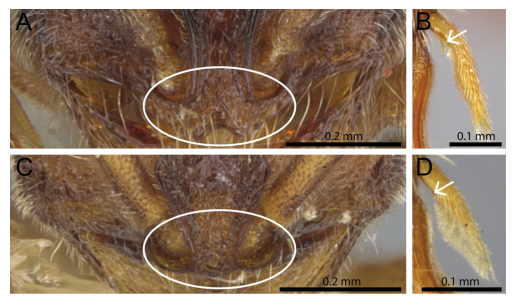

In [18]:
import requests
from PIL import Image
import matplotlib.pyplot as plt


# URL de la imagen
url = record['files'][0]['links']['self']

# Realizar la petición GET a la URL
respuesta = requests.get(url)

# Verificar que la petición fue exitosa
if respuesta.status_code == 200:
    with open('imagen_test.jpg', 'wb') as f:
        f.write(respuesta.content)
img = Image.open('imagen_test.jpg')
plt.imshow(img)
plt.axis('off')  # No mostrar ejes
plt.show()

# Ejercicio

* 1: Busca al menos dos repositorios digitales compatibles con OAI-PMH
* 2: Utiliza los verbos del protocolo para encontrar los recursos de un tema en concreto (puedes filtrar por la descripción o en las palabras clave).
* 3: Obtén un listado de los títulos, identificadores (DOI o cualquier otro) y la dirección del recurso.
* 4: A través de los distintos métodos vistos (Uso de PID/DOI, OAI-PMH o APIs concretas de repositorios) intenta llegar al fichero de un dataset para mostrarlo (gráfica, imagen...).
* 5: Busca algún repositorio de datos con una API particular y configura una petición para obtener sus datos o metadatos. (Ejemplos: AEMET, Copernicus, Ayuntamiento de Santander...)
* 6: ¿Qué problemas has encontrado? ¿Has tenido que manejar más de un formato de metadatos? ¿Qué limitaciones tiene el protocolo OAI-PMH? ¿Cómo lo mejorarías? ¿Qué pros y contras tiene el uso de una API específica con respecto a OAI-PMH?

In [19]:
#1)
# Repositorio zenodo: base=https://zenodo.org/oai2d
import xml.etree.ElementTree as ET
import requests

# Obtener la lista de records
oai = requests.get('https://zenodo.org/oai2d?verb=ListRecords&metadataPrefix=oai_datacite4')
xmlTree = ET.fromstring(oai.text)

# Definir diccionarios para los prefijos
# para encontrar records
namespaces1={'ns':'http://www.openarchives.org/OAI/2.0/'}
# para encontrar subjects
namespaces2={'ns':'http://datacite.org/schema/kernel-4'}

# Buscar todos los records
records = xmlTree.findall('.//ns:record',namespaces1)
# 2) y 3) Buscar los records que tienen un subject: Insecta, mostrar su identificador,dirección y título.
for element in records:
    identifier_oai = element.find('.//ns:identifier',namespaces1) # el identificador del registro en el repositorio OAI-PMH
    identifier_doi = element.find('.//ns:identifier',namespaces2) # el identificador doi
    subject = element.findall('.//ns:subject',namespaces2)
    for e in subject:
        if e.text == "Insecta":
            print("Title: "+ element.findall('.//ns:title',namespaces2)[0].text)
            print("Identifier oai: " + identifier_oai.text)
            print("Identifier doi: " + identifier_doi.text)
            print("Dirección: " + "https://doi.org/" + identifier_doi.text)
            print("\n")

Title: Figs. 33–36. Habitus views. 33. Aphelocerus nitidus, dorsal. 34. A. irroratus, dorsal. 35–36. A in Classification, Natural History, And Evolution Of The Genus Aphelocerus Kirsch (Coleoptera: Cleridae: Clerinae)
Identifier oai: oai:zenodo.org:5362764
Identifier doi: 10.5281/zenodo.5362764
Dirección: https://doi.org/10.5281/zenodo.5362764


Title: Figs. 25–26. 25 in A Taxonomic Revision Of The Genus Akalyptoischion Andrews (Coleoptera: Latridiidae)
Identifier oai: oai:zenodo.org:4912104
Identifier doi: 10.5281/zenodo.4912104
Dirección: https://doi.org/10.5281/zenodo.4912104


Title: FIGURE 3 in A review of the Tachinus longicornis - group of the subgenus Tachinoderus Motschulsky (Coleoptera: Staphylinidae: Tachyporinae) from China
Identifier oai: oai:zenodo.org:2618281
Identifier doi: 10.5281/zenodo.2618281
Dirección: https://doi.org/10.5281/zenodo.2618281




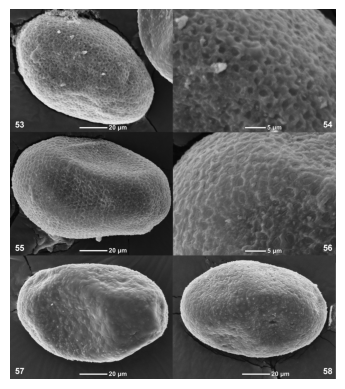

In [20]:
# 4) Mostrar la imagen
# usamos Title: FIGURES 53–58 in A new Afrotropical genus Monocentroptilum gen. n. (Ephemeroptera: Baetidae: Protopatellata)
# Identifier oai: oai:zenodo.org:1436688
import requests
from PIL import Image
import matplotlib.pyplot as plt
import json

headers = {'Accept': 'application/json'} # Queremos la respuesta en formato json
r = requests.get('https://zenodo.org/api/records/1436688',headers) # Request
record = json.loads(r.text) # Convertir la respuesta en un diccionario
url = record['files'][0]['links']['self'] # Url donde se sitúa la imagen

respuesta = requests.get(url)

# Verificar que la petición fue exitosa
if respuesta.status_code == 200:
    with open('imagen_test.jpg', 'wb') as f:
        f.write(respuesta.content)
img = Image.open('imagen_test.jpg')
plt.imshow(img)
plt.axis('off')  # No mostrar ejes
plt.show()

In [21]:
# Repositorio 2: PubMed Central (PMC)----------------------------------------------------------------------------------------
# Para ver los metadataPrefix usamos listMetadataFormats
base_url = 'https://www.ncbi.nlm.nih.gov/pmc/oai/oai.cgi'
action = '?verb=ListMetadataFormats'
oai = requests.get(base_url + action) 
xmlTree = ET.fromstring(oai.text)

#Mostrar los metadataPrefix
iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag)
    print(elem.text)

#Vamos a usar formato oai_dc

{http://www.openarchives.org/OAI/2.0/}OAI-PMH
None
{http://www.openarchives.org/OAI/2.0/}responseDate
2024-12-16T19:12:33Z
{http://www.openarchives.org/OAI/2.0/}request
https:/www.ncbi.nlm.nih.gov/pmc/oai/oai.cgi
{http://www.openarchives.org/OAI/2.0/}ListMetadataFormats


{http://www.openarchives.org/OAI/2.0/}metadataFormat
None
{http://www.openarchives.org/OAI/2.0/}metadataPrefix
oai_dc
{http://www.openarchives.org/OAI/2.0/}schema
http://www.openarchives.org/OAI/2.0/oai_dc.xsd
{http://www.openarchives.org/OAI/2.0/}metadataNamespace
http://www.openarchives.org/OAI/2.0/oai_dc/
{http://www.openarchives.org/OAI/2.0/}metadataFormat
None
{http://www.openarchives.org/OAI/2.0/}metadataPrefix
pmc
{http://www.openarchives.org/OAI/2.0/}schema
http://jats.nlm.nih.gov/archiving/1.0/xsd/JATS-archivearticle1.xsd
{http://www.openarchives.org/OAI/2.0/}metadataNamespace
http://jats.nlm.nih.gov/ns/archiving/1.0/
{http://www.openarchives.org/OAI/2.0/}metadataFormat
None
{http://www.openarchives.org/OAI/2

In [22]:
# Añadir metadataPrefix=oai_dc
oai = requests.get('https://www.ncbi.nlm.nih.gov/pmc/oai/oai.cgi?verb=ListRecords&metadataPrefix=oai_dc')
xmlTree = ET.fromstring(oai.text)

# #Para ver los prefijos de records y subjcet:
# iterator = xmlTree.iter()
# for elem in iterator:
#     print(elem.tag)
#     print(elem.text)

# Definir diccionarios para los prefijos
# para encontrar records
namespaces1={'ns':'http://www.openarchives.org/OAI/2.0/'}
# para encontrar subjects
namespaces3={'ns':'http://purl.org/dc/elements/1.1/'}

# Buscar todos los records
records = xmlTree.findall('.//ns:record',namespaces1)
# 2) y 3) Buscar los records que tienen un subject: Primary Research, mostrar su identificador, dirección y título.
for element in records:
    identifier_oai = element.find('.//ns:identifier',namespaces1) # el identificador del registro en el repositorio OAI-PMH
    identifier_PMC = element.findall('.//ns:identifier',namespaces3) # Es un identificador para los artículos en PubMed Central (PMC)
    subject = element.findall('.//ns:subject',namespaces3)
    for e in subject:
        if e.text == "Primary Research":
            print("Title: "+ element.findall('.//ns:title',namespaces3)[0].text)
            print("Identifier oai: " + identifier_oai.text) 
            for i in identifier_PMC:
                print("Identifier : " + i.text)
            print("Dirección: " + "https://www.ncbi.nlm.nih.gov" + identifier_PMC[0].text)
            print("\n")

    



Title: Comparison of written reports of mammography, sonography and magnetic resonance mammography for preoperative evaluation of breast lesions, with special emphasis on magnetic resonance mammography
Identifier oai: oai:pubmedcentral.nih.gov:13900
Identifier : /pmc/articles/PMC13900/
Identifier : /pubmed/11250746
Dirección: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC13900/


Title: BRCA1 and BRCA2 protein expressions in an ovotestis of a 46, XX true hermaphrodite
Identifier oai: oai:pubmedcentral.nih.gov:13901
Identifier : /pmc/articles/PMC13901/
Identifier : /pubmed/11250747
Dirección: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC13901/


Title: Transforming growth factors-Î² are not good biomarkers of chemopreventive efficacy in a preclinical breast cancer model system
Identifier oai: oai:pubmedcentral.nih.gov:13902
Identifier : /pmc/articles/PMC13902/
Identifier : /pubmed/11250748
Dirección: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC13902/


Title: Smoking and high-risk mammo

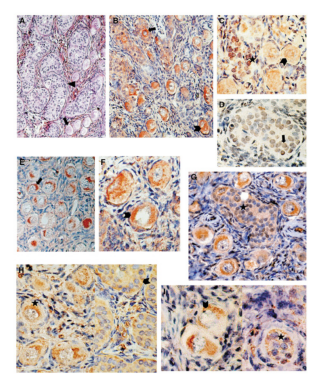

In [23]:
# 4) Mostrar la imagen
# Elegimos: Title: BRCA1 and BRCA2 protein expressions in an ovotestis of a 46, XX true hermaphrodite
#Identifier oai: oai:pubmedcentral.nih.gov:13901

headers = {'Accept': 'application/xml'}
# Usamos una api de PMC: efetch. Para recuperar datos completos del artículo
r = requests.get('https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=pmc&id=13901&rettype=xml&retmode=xml',headers) # Request
xmlTree = ET.fromstring(r.text)
iterators = xmlTree.iter()
for e in iterators:
    if e.tag == "graphic":
        # el identificador de la imagen se encuentra en los atributos de graphic
        for key,value in e.attrib.items():
            base = "https://cdn.ncbi.nlm.nih.gov/pmc/blobs/b271/13901/c1cd424b5f46/"
            # hay que combinarlo con una url base
            img_url = base + value + ".jpg"


respuesta = requests.get(img_url)

# Verificar que la petición fue exitosa
if respuesta.status_code == 200:
    with open('imagen_test.jpg', 'wb') as f:
        f.write(respuesta.content)
img = Image.open('imagen_test.jpg')
plt.imshow(img)
plt.axis('off')  # No mostrar ejes
plt.show()

In [24]:
# 5 # usamos una api (ODATA api) de copernicu, para obtener la información sobre una colección específica
# Web: https://dataspace.copernicus.eu/analyse/apis/catalogue-apis
url ="https://catalogue.dataspace.copernicus.eu/odata/v1/Products?$filter=Collection/Name eq 'SENTINEL-2'"
r = requests.get(url)
print(r.status_code)
data = json.loads(r.text)
# print(data)

# -Esta api devuelve los datos en formato json por defecto. 
# -Una de las limitaciones de OAI-PMH es que solo nos permite obtener los metadatos, como por ejemplo en este caso he tenido que utilizar ODATA api para acceder
# al contenido completo del recurso. Por lo cual, para mejorar el protocolo, quizás conviene añadir un soporte para acceder a los datos completos.
# -Además, me ha parecido inconveniente encontrar y filtrar los datos que realmente me interesen, por ejemplo para poder aplicar .find() y .findall(), 
# es necesario determinar primero el prefijo y el nombre del elemento, y a veces en un documento hay varios prefijos diferentes, y me ha parecido incoveniente encontrarlos. Aunque no sé como se puede mejorar en este caso.
# -Sobre los pros de las apis, uno de los pros ya se ha mencionado anteriormente, es que nos permite acceder no solo a los metadatos, sino al contenido completo.
# También nos permite realizar búsquedas más avanzadas, por ejemplo búsqueda por fechas/nombre/tipo...
# -En cuanto a los contras, uno de ellos quizás es que no tiene un estándar para los datos. En el caso de oai-pmh, los metadatos están descritos utilizando estándar dublin core/datacite...
# Pero en el caso de las apis, cada api puede ser diseñada de manera personalizada por el proveedor, lo que significa que no hay un estándar único.

200
